In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.utils import shuffle
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

0.33626795


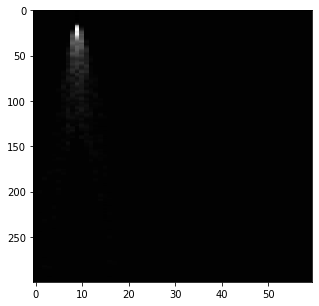

In [9]:
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuECC.npy', mmap_mode = 'r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMuCC.npy', mmap_mode = 'r')
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTauCC.npy', mmap_mode = 'r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuENC.npy', mmap_mode = 'r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMuNC.npy', mmap_mode = 'r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTauNC.npy', mmap_mode = 'r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuEGR.npy', mmap_mode = 'r')


preds_tc = np.load('/fastio2/dasha/double_pulse/preds_NuTauCC_400_Q2000_NO.npy')
preds_mc = np.load('/fastio2/dasha/double_pulse/preds_NuMuCC_400_Q2000_NO.npy')
preds_ec = np.load('/fastio2/dasha/double_pulse/preds_NuECC_400_Q2000_NO.npy')
preds_tn = np.load('/fastio2/dasha/double_pulse/preds_NuTauNC_400_Q2000_NO.npy')
preds_mn = np.load('/fastio2/dasha/double_pulse/preds_NuMuNC_400_Q2000_NO.npy')
preds_en = np.load('/fastio2/dasha/double_pulse/preds_NuENC_400_Q2000_NO.npy')
preds_eg = np.load('/fastio2/dasha/double_pulse/preds_NuEGR_400_Q2000_NO.npy')
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(111)
ax.imshow(data_tc[0]['image'].reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'gray')
print(preds_tc[0][1])

In [118]:
def MakeImg(data, i, title, x = 0.4,y =0.5):
    fig = plt.figure(figsize=(7, 7),facecolor='w')
    plt.rcParams.update({'font.size': 16})
   # plt.tight_layout()
    ax = fig.add_subplot(111)
    img = data['image'][i].copy()
    img_max = np.max(img)
    img[img<0] = 0
    img = img / img_max /1.1+ 0.01
    ax.set_title(title, pad =20)
    im = ax.imshow(img.reshape(300,60), interpolation='none', extent=[1450,2450,1000,0], aspect='auto', cmap= 'inferno',norm=LogNorm(vmin= img.min(), vmax= img.max()))
    ax.set_xlabel("Depth below the ice, m",labelpad=15)
    ax.set_ylabel("Time, ns",labelpad=10)
    #print(data['neutrino']['energy'][i],data['q_tot'][i],data['q_st'][i])
    #name = "Nu Energy = {0:.0f} GeV\nQt = {1:.0f} PE\nQs = {2:.0f} PE".format(data['neutrino']['energy'][i][0],data['q_tot'][i][0],data['q_st'][i][0])
    #ax.text(x,y, name, transform=ax.transAxes, color = "white")
    #im.set_clim(0.01,1)
    plt.gcf().subplots_adjust(left=0.15)
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    #fig.colorbar(im, cax=cax, orientation='vertical')
    #plt.title("Label = {0:.0f}, En = {1:.0f} GeV, Qt = {2:.0f} PE, Qs = {3:.0f} PE, i = {4}".format(nu_labels[i], nu_info[i][0],nu_info[i][1],nu_info[i][2],i))
    fig.savefig('NuESig.pdf', format='PDF')

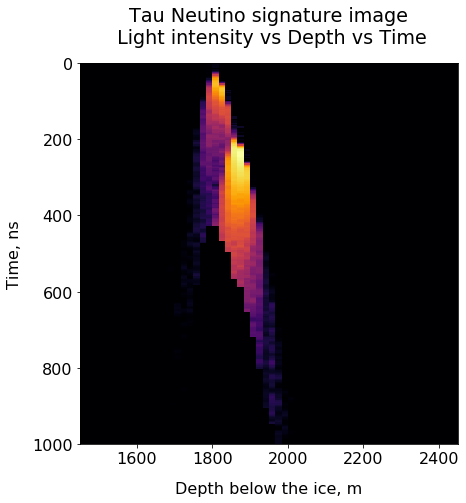

In [117]:
MakeImg(data_tc,14443, "Tau Neutino signature image\n Light intensity vs Depth vs Time")

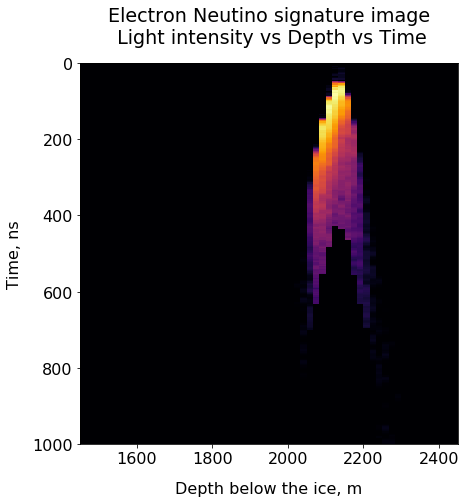

In [119]:
MakeImg(data_ec,297, "Electron Neutino signature image\n Light intensity vs Depth vs Time")

64
69
123
126
144
244
255
297
434
451
497
567
631
679
711
723
765
769
795
809
824
933


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


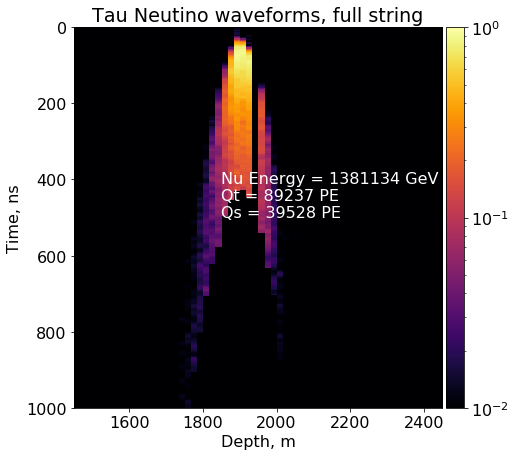

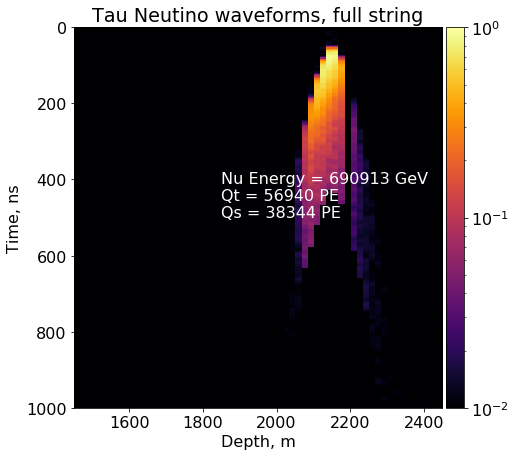

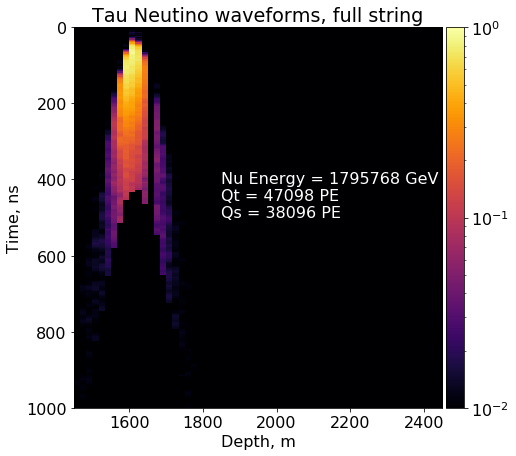

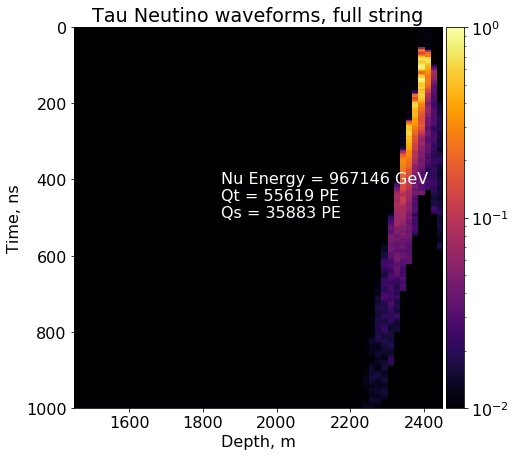

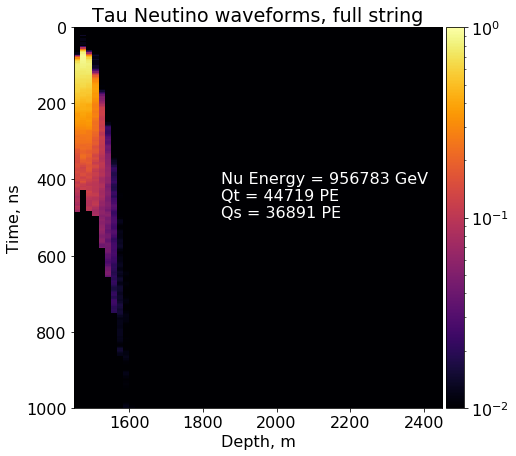

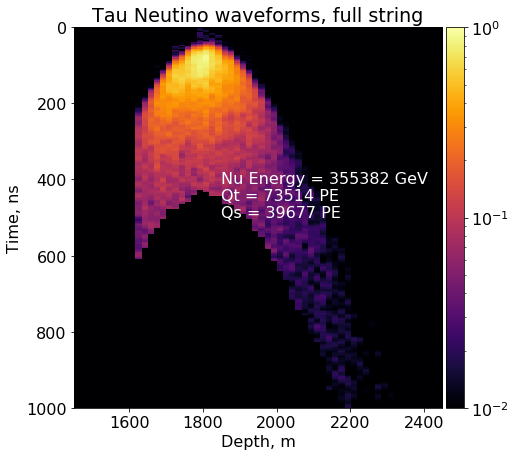

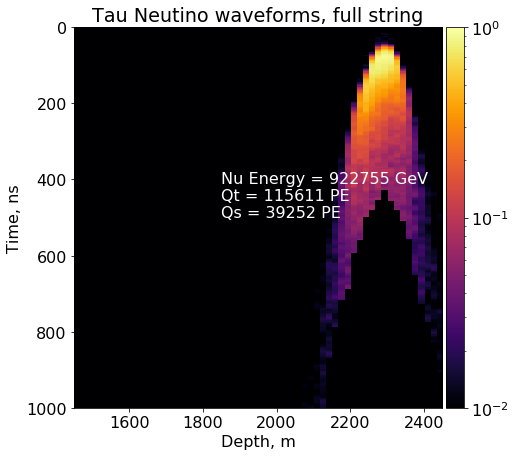

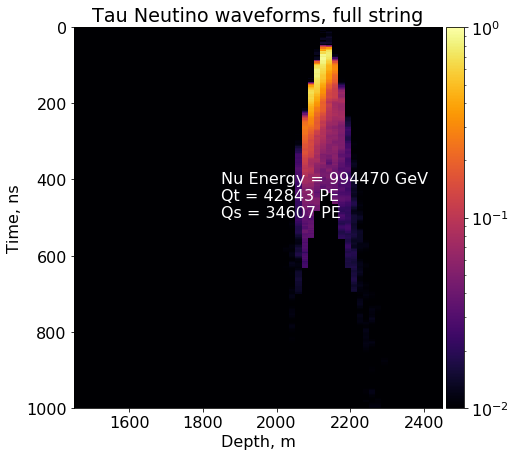

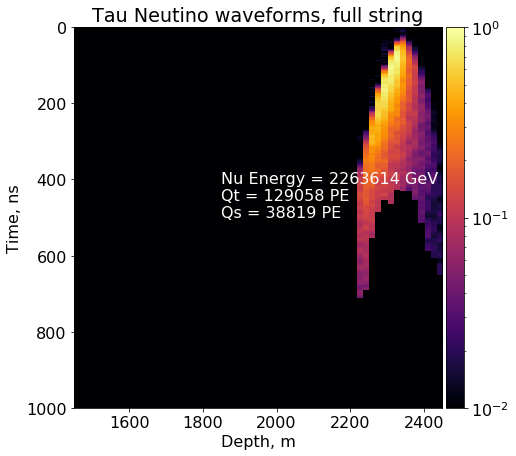

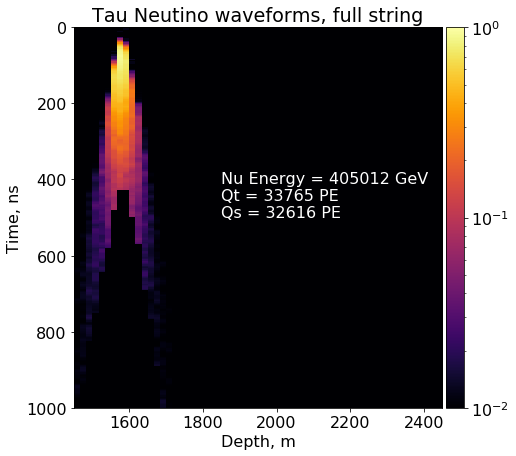

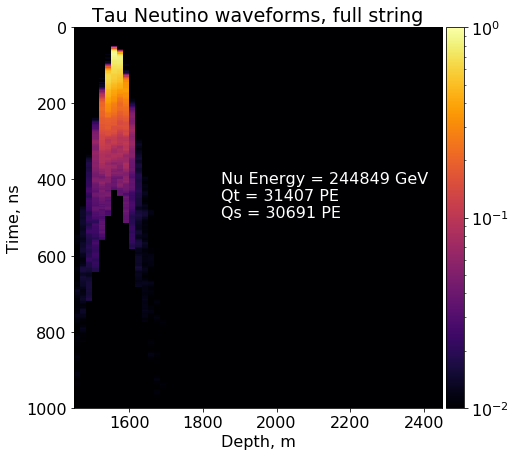

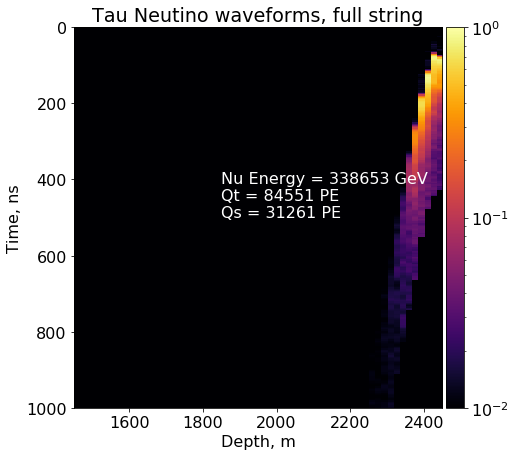

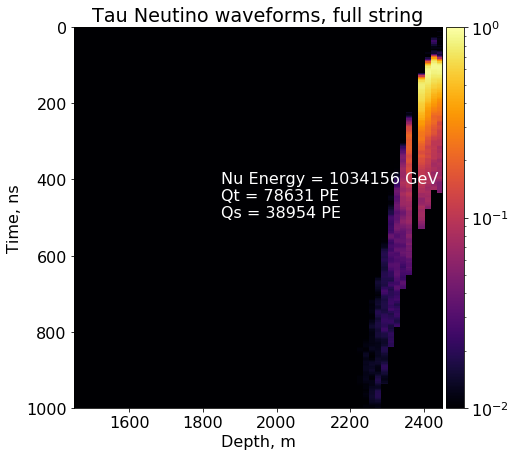

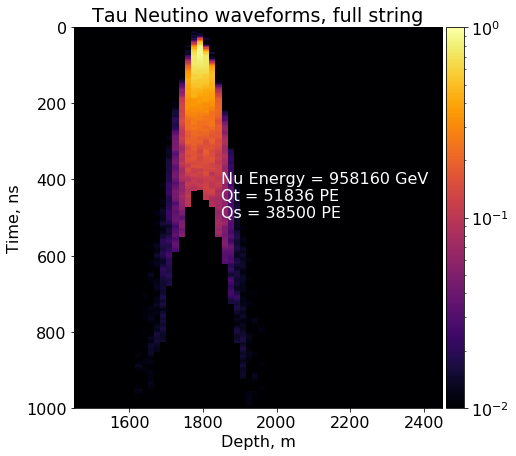

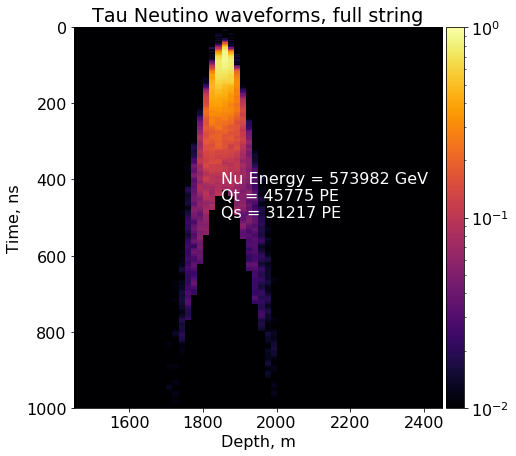

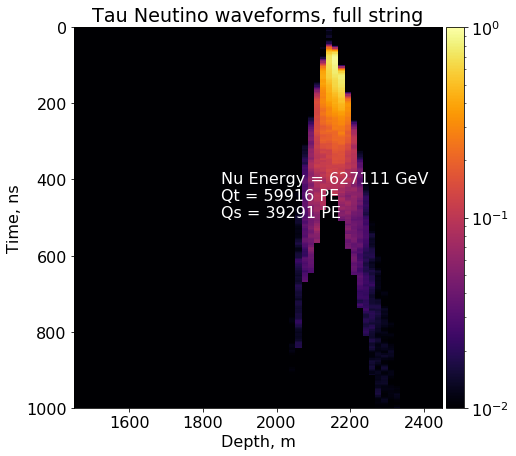

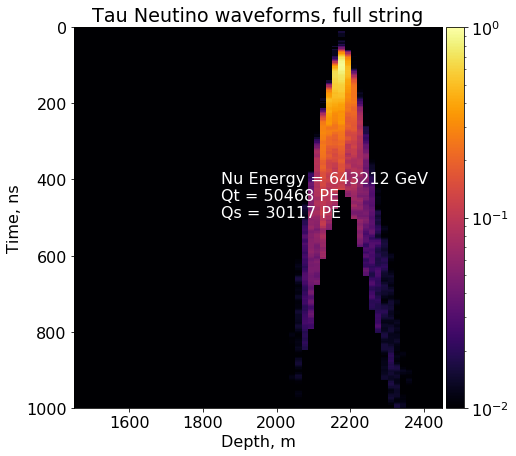

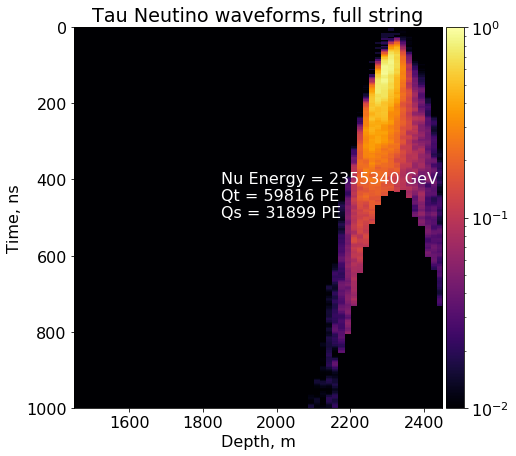

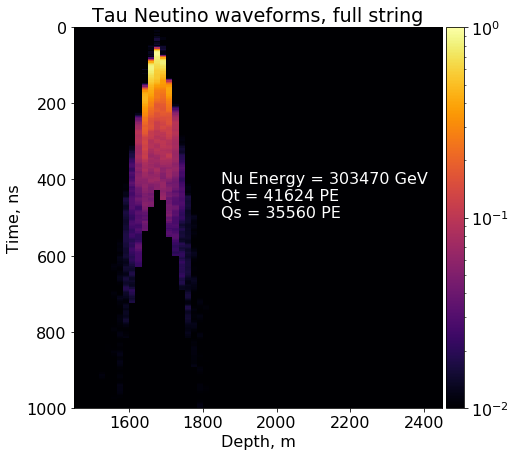

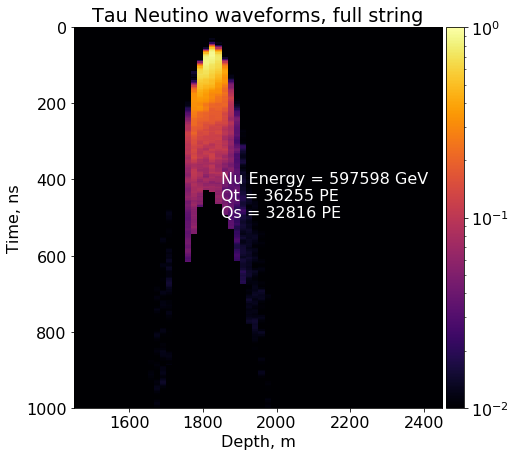

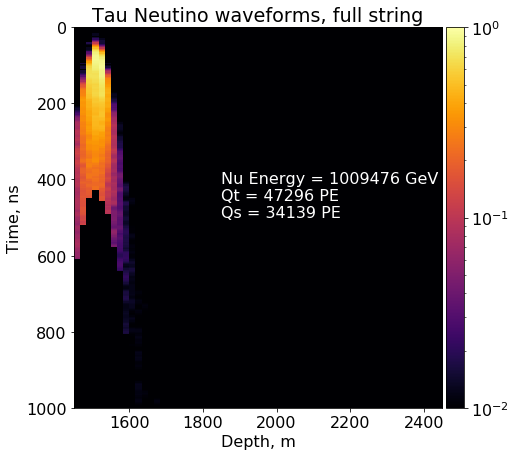

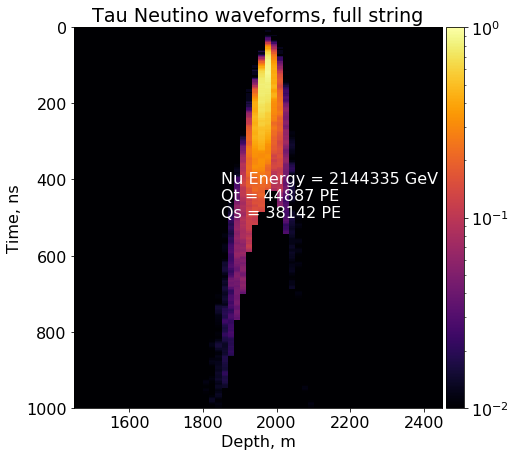

In [74]:
for i,p in enumerate(preds_ec[1000:2000,0]):
    #print(i)
    if (data_ec[i]['q_st']>30000) and (data_ec[i]['q_st']<40000):
        print(i)
        MakeImg(data_ec,i, "Tau Neutino waveforms, full string")

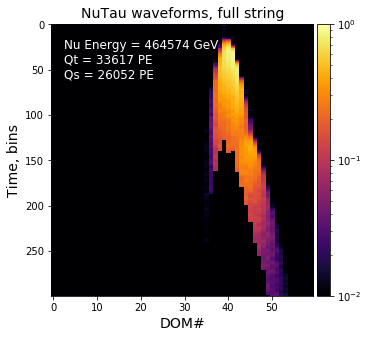

In [6]:
MakeImg(2100022,"NuTau waveforms, full string", x = 0.05, y = 0.8)

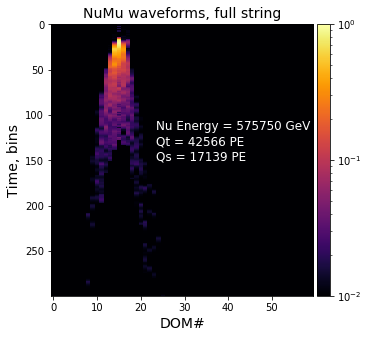

In [7]:
MakeImg(1400028,"NuMu waveforms, full string")

In [103]:
#for i in range(1400000,1400100):
#    MakeImg(i)

In [263]:
def Plot(i, j, n, title, pos = 0.75, color = 'k'):
    plt.rcParams['axes.facecolor']='white'
    name = "Nu Energy = {0:.0f} GeV\nQevent = {1:.0f} PE\nQstring = {2:.0f} PE".format(nu_info[i][0],nu_info[i][1],nu_info[i][2])
    img = nu_data[i].copy()
    img[img<0] = 0
    img = img / 10**(-12)
    fig = plt.figure(figsize=(5, 5),facecolor='w')
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize = 14)
    ax.text(0.4,pos, name, transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_xlabel("Time, bins", fontsize = 14)
    ax.set_xlim(0,200)
   # plt.set_axis_bgcolor('white')
    ax.set_ylabel("Amplitude, mV", fontsize = 14)                                                   
    for k in range(j,j+n):
        ax.plot(img[:,k], c = tuple(color), lw =2, label = 'DOM#{0:2d}'.format(k))  
        color[3] = color[3]-1/n 
    plt.legend()   

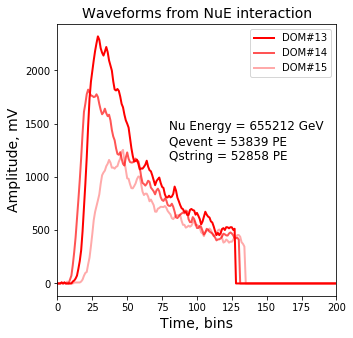

In [267]:
Plot(39, 13, 3,"Waveforms from NuE interaction", 0.5, color = ([1,0,0,1]))

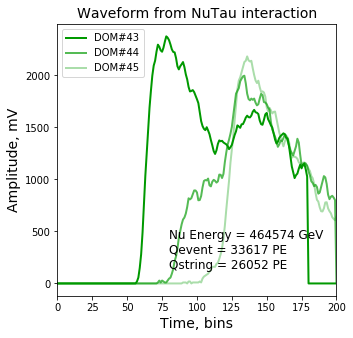

In [271]:
Plot(2100022,43,3,"Waveform from NuTau interaction", 0.1, color = ([0,0.6,0,1]))

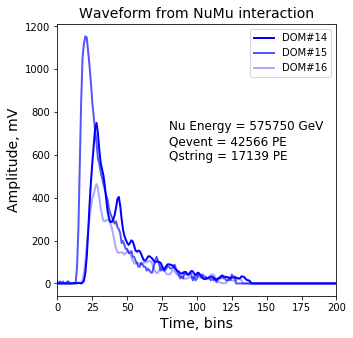

In [269]:
Plot(1400028,14,3,"Waveform from NuMu interaction", 0.5, color = ([0,0,1,1]))